#  **Understanding promotions and Adstock effect**

## **Abstarct**

Promotions play an important in marketing and trageting is one of the important part of it, but adstock plays most important role in understanding the spending and budgeting ads. This notebook aims to 


*   Able to analyze marketing data 
*   Derive insights from the datasets
*   How is sales related to week numbers?
*   How does TV spending affect sales? Can you quantify it?
*   Are there any adstock effects for TV ad spending? 
*   How does Radio spending affect sales? Can you quantify it?
*   Are there any adstock effects for radio ad spending? 



Mounting Google D

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Giving path for drive

In [0]:
googlepath = '/content/drive/My Drive/ADM/Assignment3_part_1'

In [0]:
#importing required library

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
test = pd.read_csv(googlepath+'/test (1).csv')

#renaming the index column
test.rename(columns={'Unnamed: 0':'Index'}, inplace=True)
test.columns

Index(['Index', 'base_sales', 'tv_Sales_1', 'temp', 'tv_spend', 'week',
       'adstock_TV_1', 'tv_Sales_2', 'tv_Radio_Sales_1', 'tv_Radio_Sales_2',
       'radioSpend', 'tv_Sales_2_Adstock', 'tv_Radio_Sales_1_Adstock',
       'tv_Radio_Sales_2_Adstock', 'Serial number'],
      dtype='object')

Checking if the data has nay null values

In [5]:
missing_percentage = test.isnull().sum() / test.shape[0] * 100
missing_percentage

Index                       0.0
base_sales                  0.0
tv_Sales_1                  0.0
temp                        0.0
tv_spend                    0.0
week                        0.0
adstock_TV_1                0.0
tv_Sales_2                  0.0
tv_Radio_Sales_1            0.0
tv_Radio_Sales_2            0.0
radioSpend                  0.0
tv_Sales_2_Adstock          0.0
tv_Radio_Sales_1_Adstock    0.0
tv_Radio_Sales_2_Adstock    0.0
Serial number               0.0
dtype: float64

In [0]:
from sklearn import preprocessing

 
float_array = test[['base_sales']].values.astype(float)
 


min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)


test["Normalized_base_sales"]=pd.DataFrame(scaled_array)

test["Normalized_base_sales"] = test["Normalized_base_sales"]*10

SInce the data has very large variance , we need to normalize the data  

In [0]:
from sklearn import preprocessing

 
float_array = test[['temp']].values.astype(float)
 


min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)


test["new_temp"]=pd.DataFrame(scaled_array)

#test["Normalized_base_sales"] = test["Normalized_base_sales"]*10

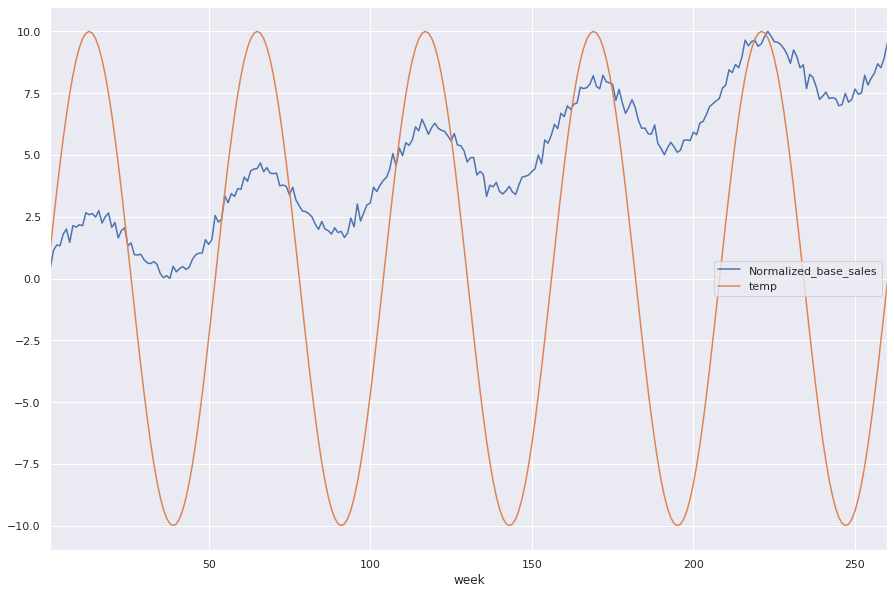

In [8]:
#plot.xticks(np.arange(0,300,5),rotation=90)
test.plot(x='week',y=['Normalized_base_sales','temp'],figsize=(15,10), grid=True)

The above visualization demonstrates the seasonality of the product in question.

In [0]:
min_var = {}
count = 1
for i in np.arange(0, 260, 52):
  min_var['Year ' + str(count)] = [min(test.base_sales.iloc[i:i+52]), ((count-1)*52) + np.argmin(np.array(test.base_sales.iloc[i:i+52]))]
  count +=1


In [0]:
min_var

{'Year 1': [989.3498655, 37],
 'Year 2': [1028.010329, 91],
 'Year 3': [1066.7545380000001, 135],
 'Year 4': [1105.918575, 190],
 'Year 5': [1152.120244, 244]}

In [0]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    # filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    #plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

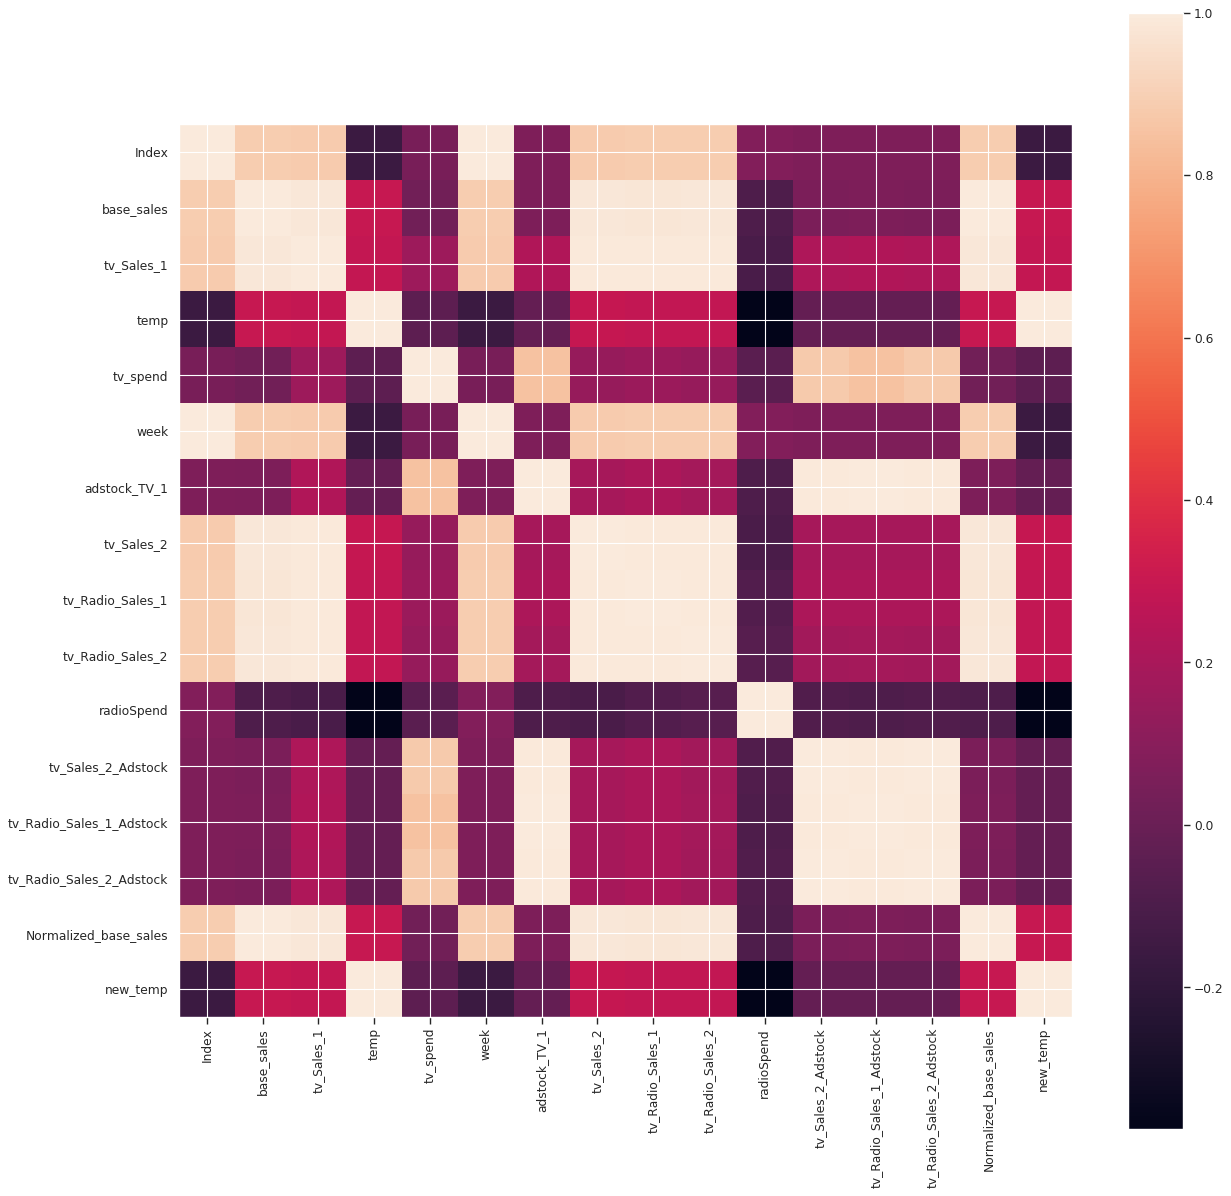

In [0]:
plotCorrelationMatrix(test,18)

In [0]:
test = test.drop(['Index'], axis=1)

test.corr()

,base_sales,tv_Sales_1,temp,tv_spend,week,adstock_TV_1,tv_Sales_2,tv_Radio_Sales_1,tv_Radio_Sales_2,radioSpend,tv_Sales_2_Adstock,tv_Radio_Sales_1_Adstock,tv_Radio_Sales_2_Adstock,Normalized_base_sales,new_temp
base_sales,1.000000,0.987018,0.300643,0.026939,0.891951,0.062555,0.984278,0.981659,0.984432,-0.093344,0.059380,0.062555,0.059380,1.000000,0.300643
tv_Sales_1,0.987018,1.000000,0.290827,0.163160,0.882792,0.222038,0.992922,0.993457,0.991438,-0.105823,0.218020,0.222038,0.218020,0.987018,0.290827
temp,0.300643,0.290827,1.000000,-0.039949,-0.155935,-0.017935,0.293180,0.283290,0.282488,-0.374131,-0.018548,-0.017935,-0.018548,0.300643,1.000000
tv_spend,0.026939,0.163160,-0.039949,1.000000,0.047702,0.850344,0.145291,0.160173,0.144868,-0.049293,0.878643,0.850344,0.878643,0.026939,-0.039949
week,0.891951,0.882792,-0.155935,0.047702,1.000000,0.070837,0.885889,0.887467,0.890582,0.077178,0.068880,0.070837,0.068880,0.891951,-0.155935
adstock_TV_1,0.062555,0.222038,-0.017935,0.850344,0.070837,1.000000,0.194684,0.213915,0.184529,-0.090917,0.994306,1.000000,0.994306,0.062555,-0.017935
tv_Sales_2,0.984278,0.992922,0.293180,0.145291,0.885889,0.194684,1.000000,0.993862,0.992191,-0.100655,0.192799,0.194684,0.192799,0.984278,0.293180
tv_Radio_Sales_1,0.981659,0.993457,0.283290,0.160173,0.887467,0.213915,0.993862,1.000000,0.992993,-0.076032,0.211592,0.213915,0.211592,0.981659,0.283290
tv_Radio_Sales_2,0.984432,0.991438,0.282488,0.144868,0.890582,0.184529,0.992191,0.992993,1.000000,-0.061307,0.184014,0.184529,0.184014,0.984432,0.282488
radioSpend,-0.093344,-0.105823,-0.374131,-0.049293,0.077178,-0.090917,-0.100655,-0.076032,-0.061307,1.000000,-0.082985,-0.090917,-0.082985,-0.093344,-0.374131


In [0]:
import numpy as np
import pandas as pd

import statsmodels.api as sm

 ### TV spending affect sales

In [0]:
X = test[["tv_spend","base_sales"]] ## X usually means our input variables (or independent variables)
e = np.random.normal(size=260)
y = test["tv_Sales_1"] + e ## Y usually means our output/dependent variable
#X=sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             tv_Sales_1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.339e+06
Date:                Fri, 21 Feb 2020   Prob (F-statistic):                        0.00
Time:                        02:31:33   Log-Likelihood:                         -809.94
No. Observations:                 260   AIC:                                      1624.
Df Residuals:                     258   BIC:                                      1631.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tv_spend       0.1322      0.005     25.523      0.000       0.122       0.142
base_sales     1.0014      0.000   3083.289      0.000       1.001       1.002
==============================================================================
Omnibus:                       66.310   Durbin-Watson:                   0.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1290.686
Skew:                          -0.361   Prob(JB):                    5.38e-281
Kurtosis:                      13.891   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

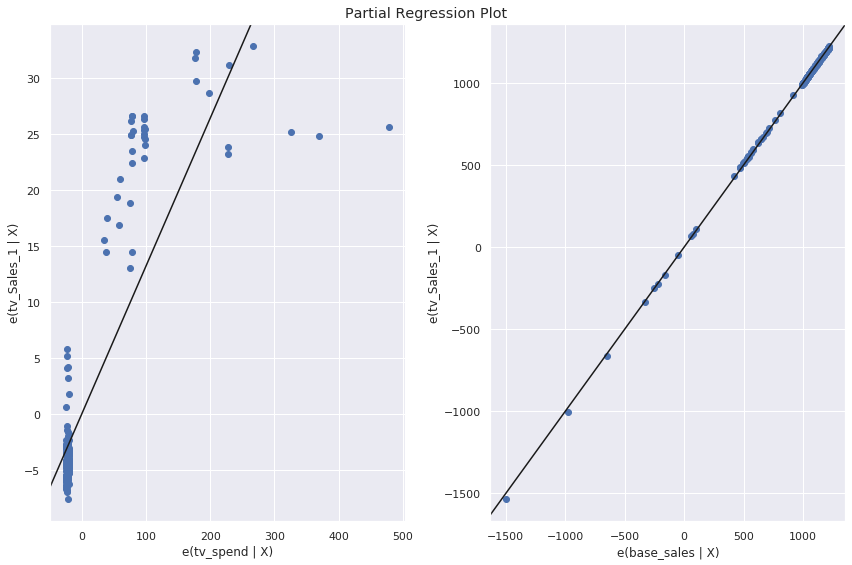

In [0]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [0]:
test.columns
test_new = test[["base_sales","tv_Sales_1","tv_spend"]]
test_new

,base_sales,tv_Sales_1,tv_spend
0,999.420481,999.420481,0
1,1016.029389,1016.029389,0
2,1020.880747,1020.880747,0
3,1020.230930,1020.230930,0
4,1031.258145,1031.258145,0
...,...,...,...
255,1182.811882,1182.811934,0
256,1191.700526,1191.700542,0
257,1187.976077,1187.976081,0
258,1196.694780,1196.694782,0


In [0]:
test_new["Difference_b/w_base_Tv_sales"] = test_new["tv_Sales_1"] - test_new["base_sales"]
test_new

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,base_sales,tv_Sales_1,tv_spend,Difference_b/w_base_Tv_sales
0,999.420481,999.420481,0,0.000000
1,1016.029389,1016.029389,0,0.000000
2,1020.880747,1020.880747,0,0.000000
3,1020.230930,1020.230930,0,0.000000
4,1031.258145,1031.258145,0,0.000000
...,...,...,...,...
255,1182.811882,1182.811934,0,0.000052
256,1191.700526,1191.700542,0,0.000016
257,1187.976077,1187.976081,0,0.000004
258,1196.694780,1196.694782,0,0.000002


In [0]:
sum_column = test_new.sum(axis=0)
profit_tv_sales_1 = sum_column[1]-(sum_column[0]+ sum_column[2])
profit_tv_sales_1

-4659.784380500147

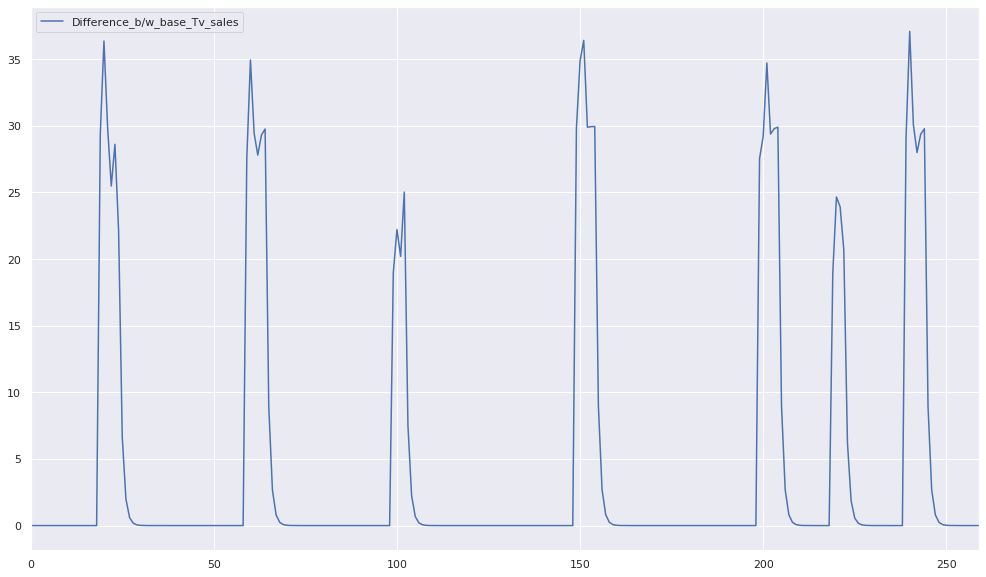

In [0]:
test_new.plot(y='Difference_b/w_base_Tv_sales',figsize=(17,10), grid=True)

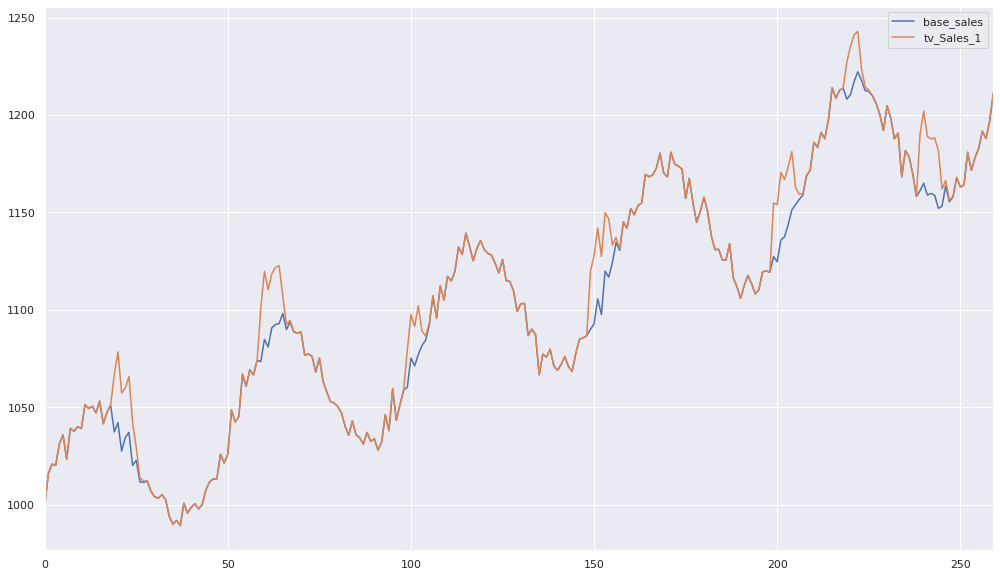

In [0]:
test_new.plot(y=['base_sales','tv_Sales_1'],figsize=(17,10), grid=True)

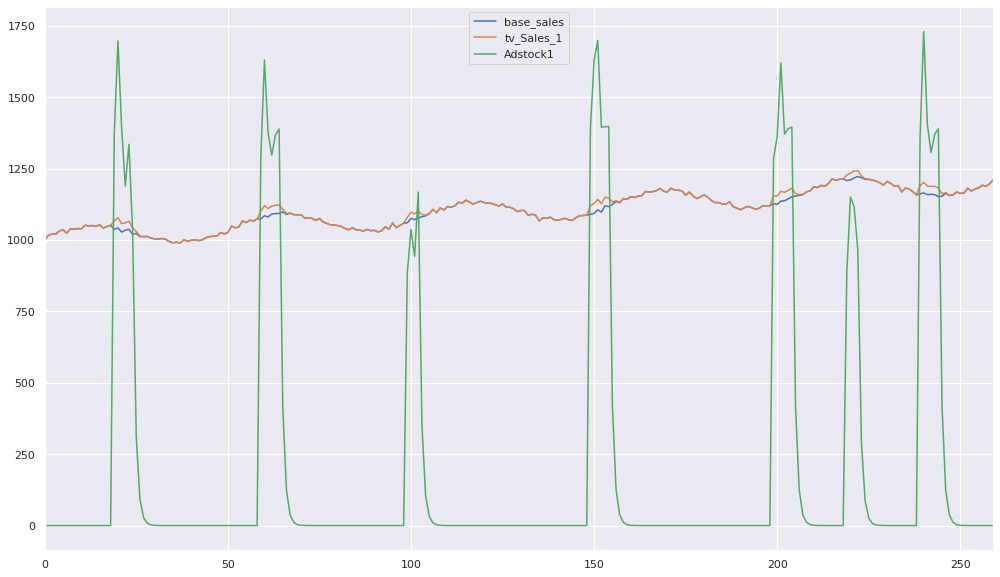

In [0]:
test['Adstock1']= test['adstock_TV_1']*1400
test.plot(y=['base_sales','tv_Sales_1','Adstock1'],figsize=(17,10), grid=True)

In [0]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
test.columns

Index(['base_sales', 'tv_Sales_1', 'temp', 'tv_spend', 'week', 'adstock_TV_1',
       'tv_Sales_2', 'tv_Radio_Sales_1', 'tv_Radio_Sales_2', 'radioSpend',
       'tv_Sales_2_Adstock', 'tv_Radio_Sales_1_Adstock',
       'tv_Radio_Sales_2_Adstock', 'Serial number', 'Normalized_base_sales',
       'new_temp', 'Adstock1'],
      dtype='object')

In [0]:
X = test[["radioSpend","tv_Sales_1"]] ## X usually means our input variables (or independent variables)
e = np.random.normal(size=260)
y = test["tv_Radio_Sales_1"] + e ## Y usually means our output/dependent variable
#X=sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       tv_Radio_Sales_1   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.204e+06
Date:                Fri, 21 Feb 2020   Prob (F-statistic):                        0.00
Time:                        02:31:36   Log-Likelihood:                         -876.74
No. Observations:                 260   AIC:                                      1757.
Df Residuals:                     258   BIC:                                      1765.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radioSpend     0.0767      0.018      4.227      0.000       0.041       0.112
tv_Sales_1     1.0011      0.000   2436.572      0.000       1.000       1.002
==============================================================================
Omnibus:                        0.450   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.246
Skew:                          -0.050   Prob(JB):                        0.884
Kurtosis:                       3.112   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

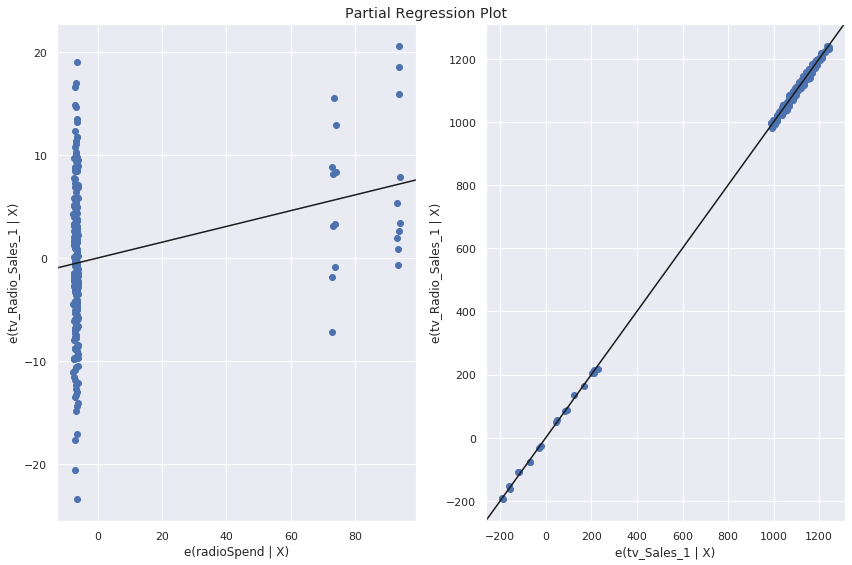

In [0]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model, fig=fig)

In [0]:
test.columns
test_new1 = test[["tv_Radio_Sales_1","tv_Sales_1","radioSpend"]]
test_new1["Difference_b/w_tv_Sales_1_tv_Radio_Sales_1"] = test["tv_Radio_Sales_1"] - test_new["tv_Sales_1"]
test_new1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tv_Radio_Sales_1,tv_Sales_1,radioSpend,Difference_b/w_tv_Sales_1_tv_Radio_Sales_1
0,1008.322089,999.420481,0,8.901608
1,1004.325565,1016.029389,0,-11.703824
2,1019.312032,1020.880747,0,-1.568715
3,1023.269288,1020.230930,0,3.038358
4,1030.450885,1031.258145,0,-0.807260
...,...,...,...,...
255,1191.400437,1182.811934,0,8.588503
256,1193.942227,1191.700542,0,2.241685
257,1195.002871,1187.976081,0,7.026790
258,1200.338502,1196.694782,0,3.643720


In [0]:
sum_column1 = test_new1.sum(axis=0)
sum_column1
profit_tv_sales_radio_1 = sum_column1[0]-sum_column1[1]- sum_column1[2]-sum_column[2]
profit_tv_sales_1


-4659.784380500147

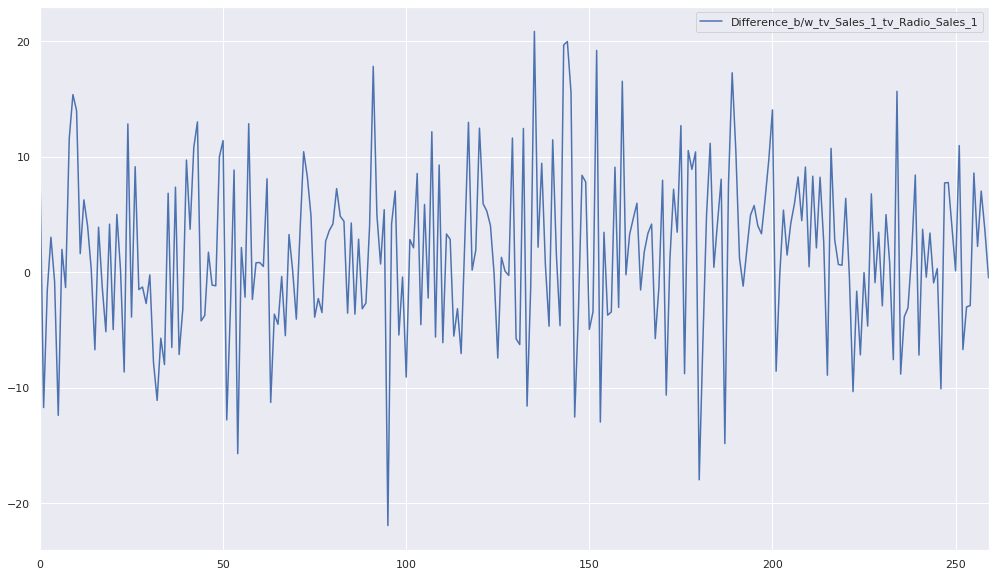

In [0]:
test_new1.plot(y='Difference_b/w_tv_Sales_1_tv_Radio_Sales_1',figsize=(17,10), grid=True)

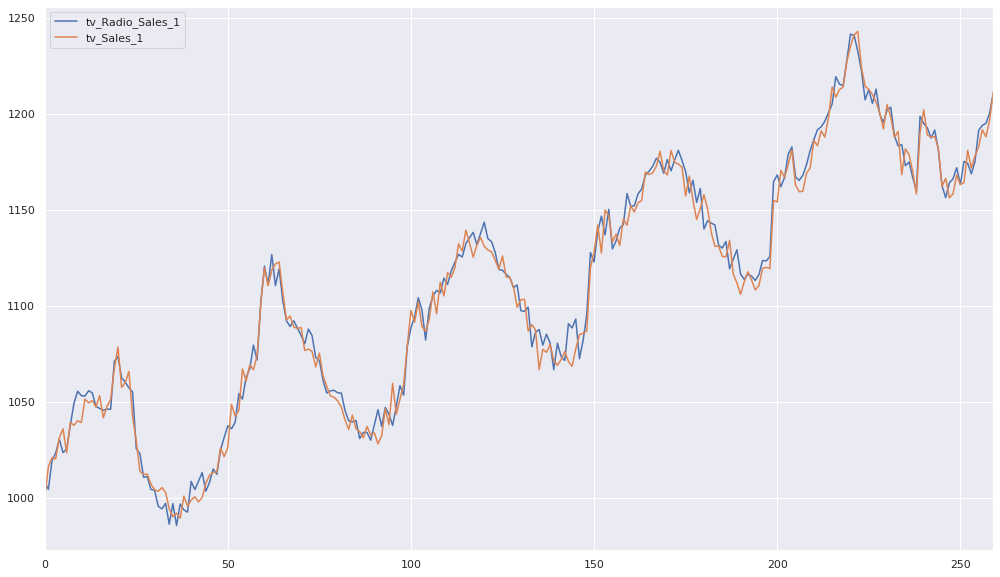

In [0]:
test_new1.plot(y=['tv_Radio_Sales_1','tv_Sales_1'],figsize=(17,10), grid=True)

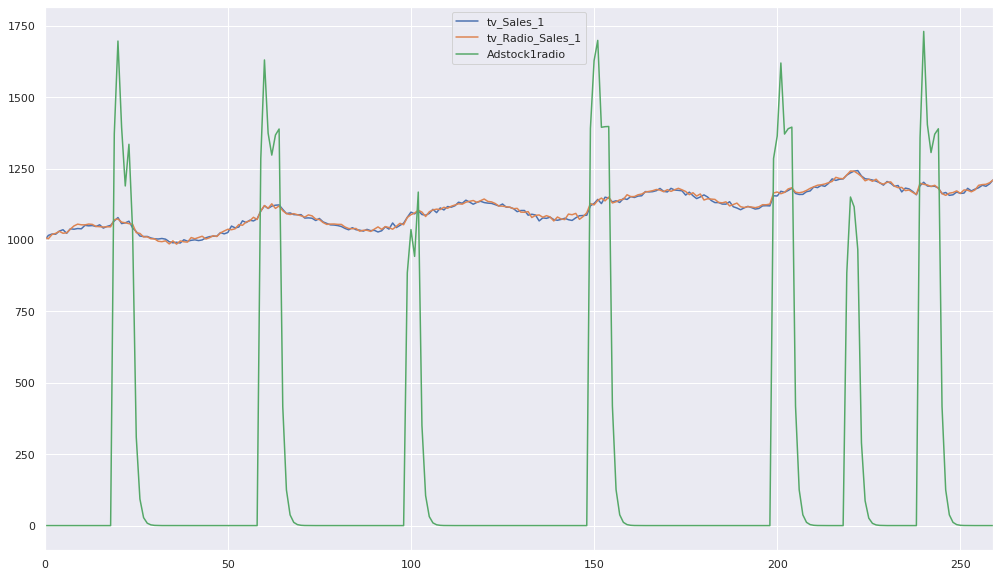

In [0]:
test['Adstock1radio']= test['tv_Radio_Sales_1_Adstock']*1400
test.plot(y=['tv_Sales_1','tv_Radio_Sales_1','Adstock1radio'],figsize=(17,10), grid=True)

Index(['base_sales', 'tv_Sales_1', 'temp', 'tv_spend', 'week', 'adstock_TV_1',
       'tv_Sales_2', 'tv_Radio_Sales_1', 'tv_Radio_Sales_2', 'radioSpend',
       'tv_Sales_2_Adstock', 'tv_Radio_Sales_1_Adstock',
       'tv_Radio_Sales_2_Adstock', 'Serial number', 'Normalized_base_sales',
       'new_temp', 'Adstock1', 'Adstock1radio'],
      dtype='object')

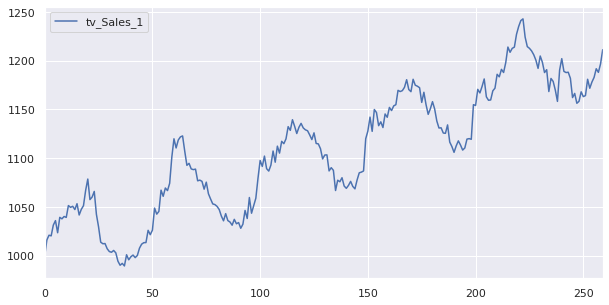

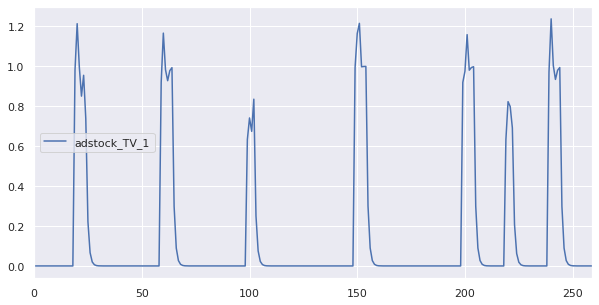

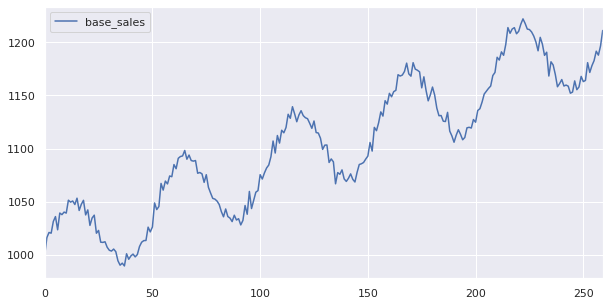

In [0]:
test.plot(y=['tv_Sales_1'],figsize=(10,5), grid=True)
test.plot(y=['adstock_TV_1'],figsize=(10,5), grid=True)
test.plot(y=['base_sales'],figsize=(10,5), grid=True)

test.columns


In [0]:
min_var = {}
count = 1
for i in np.arange(0, 260, 52):
  min_var['Year ' + str(count)] = [min(test.base_sales.iloc[i:i+52]), ((count-1)*52) + np.argmin(np.array(test.base_sales.iloc[i:i+52]))]
  count +=1

In [0]:
X = test[["tv_spend","base_sales"]] ## X usually means our input variables (or independent variables)
e = np.random.normal(size=260)
y = test["tv_Sales_2"] + e ## Y usually means our output/dependent variable
#X=sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model_2 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model_2.predict(X)

# Print out the statistics
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             tv_Sales_2   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.298e+06
Date:                Fri, 21 Feb 2020   Prob (F-statistic):                        0.00
Time:                        02:31:39   Log-Likelihood:                         -919.43
No. Observations:                 260   AIC:                                      1843.
Df Residuals:                     258   BIC:                                      1850.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
tv_spend       0.1145      0.008     14.518      0.000       0.099       0.130
base_sales     1.0014      0.000   2023.681      0.000       1.000       1.002
==============================================================================
Omnibus:                       10.889   Durbin-Watson:                   2.113
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               13.322
Skew:                           0.355   Prob(JB):                      0.00128
Kurtosis:                       3.852   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

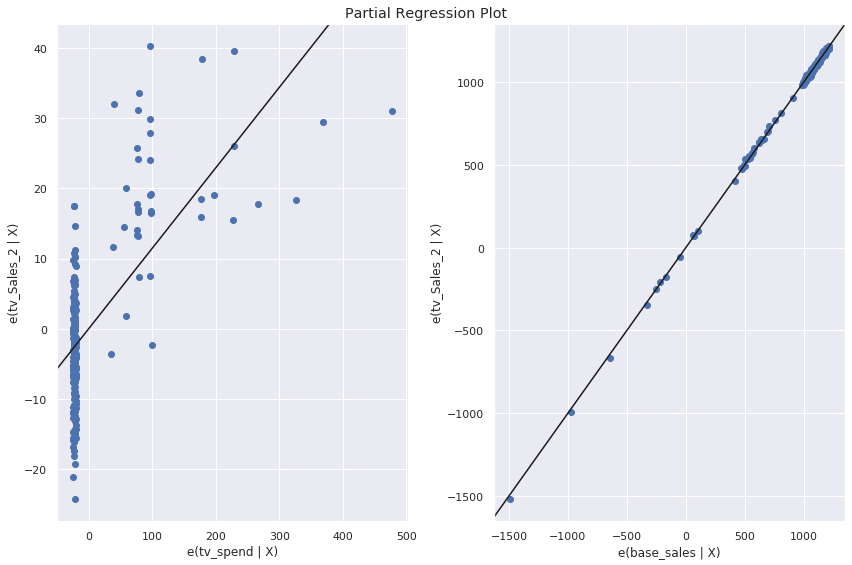

In [0]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model_2, fig=fig)

In [0]:
test.columns
test_new_sale2 = test[["base_sales","tv_Sales_2","tv_spend"]]
test_new_sale2

,base_sales,tv_Sales_2,tv_spend
0,999.420481,1003.276688,0
1,1016.029389,1008.322283,0
2,1020.880747,1011.757184,0
3,1020.230930,1020.124702,0
4,1031.258145,1038.014845,0
...,...,...,...
255,1182.811882,1183.794947,0
256,1191.700526,1180.486558,0
257,1187.976077,1193.551833,0
258,1196.694780,1207.741175,0


In [0]:
sum_column = test_new_sale2.sum(axis=0)
sum_column 
profit_tv_sales_2 = sum_column[1] - sum_column[0]-sum_column[2]
profit_tv_sales_2

-4770.290681100101

In [0]:
test_new_sale2["Difference_b/w_base_Tv_sales2"] = test_new_sale2["tv_Sales_2"] - test_new_sale2["base_sales"]
test_new_sale2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,base_sales,tv_Sales_2,tv_spend,Difference_b/w_base_Tv_sales2
0,999.420481,1003.276688,0,3.856207
1,1016.029389,1008.322283,0,-7.707106
2,1020.880747,1011.757184,0,-9.123563
3,1020.230930,1020.124702,0,-0.106228
4,1031.258145,1038.014845,0,6.756700
...,...,...,...,...
255,1182.811882,1183.794947,0,0.983065
256,1191.700526,1180.486558,0,-11.213968
257,1187.976077,1193.551833,0,5.575756
258,1196.694780,1207.741175,0,11.046395


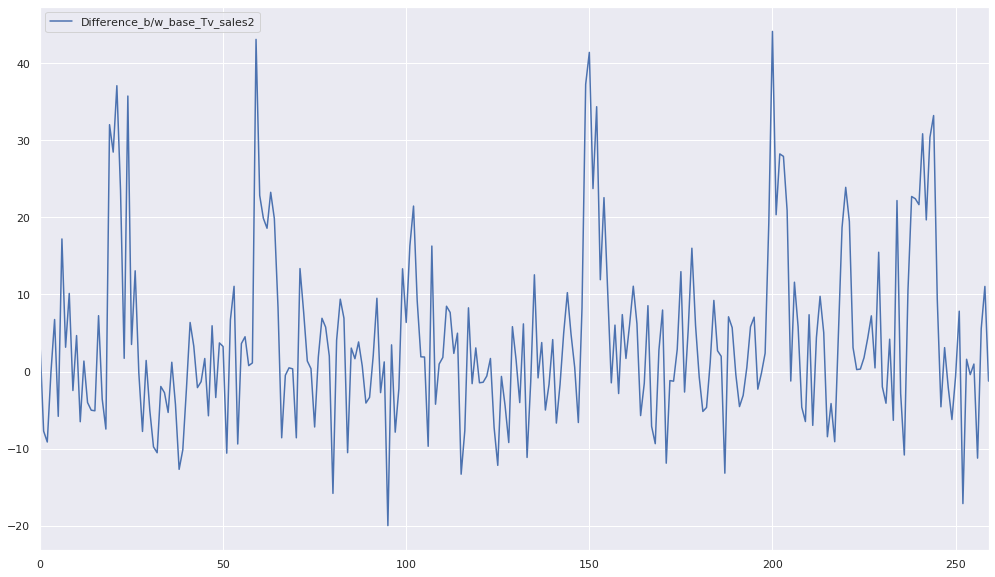

In [0]:
test_new_sale2.plot(y='Difference_b/w_base_Tv_sales2',figsize=(17,10), grid=True)

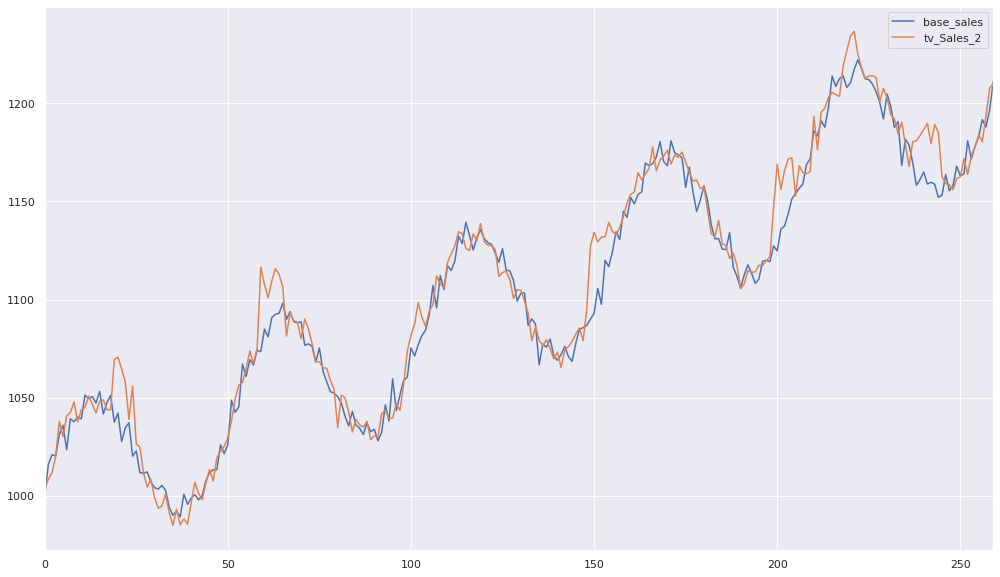

In [0]:
test_new_sale2.plot(y=['base_sales','tv_Sales_2'],figsize=(17,10), grid=True)

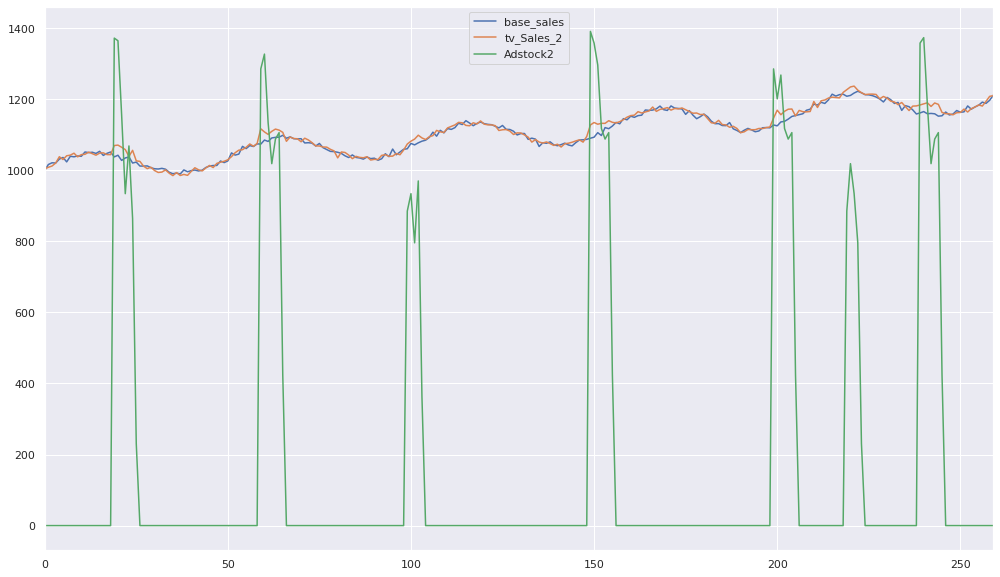

In [0]:
test['Adstock2']= test['tv_Sales_2_Adstock']*1400
test.plot(y=['base_sales','tv_Sales_2','Adstock2'],figsize=(17,10), grid=True)

In [0]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
test.columns

Index(['base_sales', 'tv_Sales_1', 'temp', 'tv_spend', 'week', 'adstock_TV_1',
       'tv_Sales_2', 'tv_Radio_Sales_1', 'tv_Radio_Sales_2', 'radioSpend',
       'tv_Sales_2_Adstock', 'tv_Radio_Sales_1_Adstock',
       'tv_Radio_Sales_2_Adstock', 'Serial number', 'Normalized_base_sales',
       'new_temp', 'Adstock1', 'Adstock1radio', 'Adstock2'],
      dtype='object')

In [0]:
X = test[["radioSpend","tv_Sales_2"]] ## X usually means our input variables (or independent variables)
e = np.random.normal(size=260)
y = test["tv_Radio_Sales_2"] + e ## Y usually means our output/dependent variable
#X=sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model_radio_sales2 = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model_radio_sales2.predict(X)

# Print out the statistics
model_radio_sales2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       tv_Radio_Sales_2   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.841e+06
Date:                Fri, 21 Feb 2020   Prob (F-statistic):                        0.00
Time:                        02:31:41   Log-Likelihood:                         -892.05
No. Observations:                 260   AIC:                                      1788.
Df Residuals:                     258   BIC:                                      1795.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
radioSpend     0.1047      0.019      5.439      0.000       0.067       0.143
tv_Sales_2     1.0001      0.000   2293.995      0.000       0.999       1.001
==============================================================================
Omnibus:                        1.285   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.526   Jarque-Bera (JB):                1.133
Skew:                           0.160   Prob(JB):                        0.568
Kurtosis:                       3.041   Cond. No.                         45.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

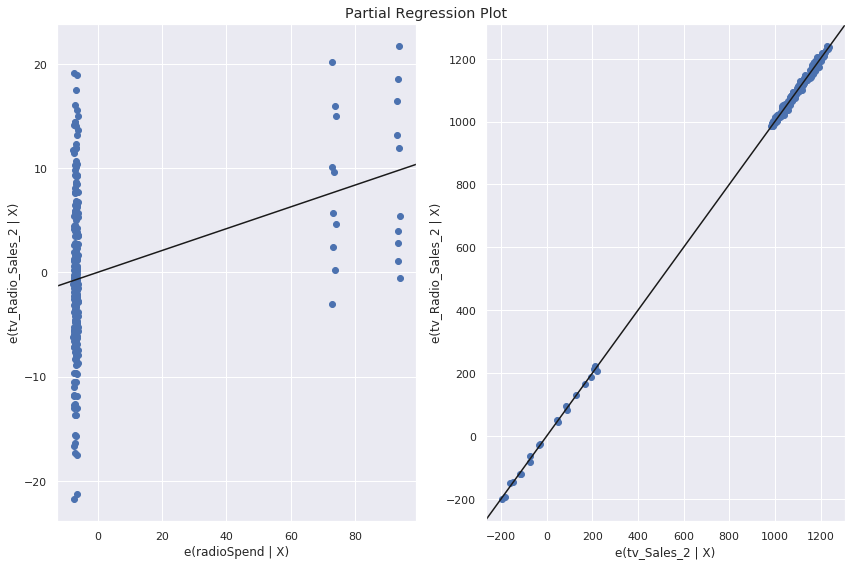

In [0]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_partregress_grid(model_radio_sales2, fig=fig)

In [0]:
test.columns
test_new_radio2 = test[["tv_Radio_Sales_2","tv_Sales_2","radioSpend"]]
test_new_radio2["Difference_b/w_tv_Sales_2_tv_Radio_Sales_2"] = test["tv_Radio_Sales_2"] - test_new_radio2["tv_Sales_2"]
test_new_radio2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tv_Radio_Sales_2,tv_Sales_2,radioSpend,Difference_b/w_tv_Sales_2_tv_Radio_Sales_2
0,1007.485460,1003.276688,0,4.208772
1,1005.948293,1008.322283,0,-2.373990
2,1018.708342,1011.757184,0,6.951158
3,1016.475639,1020.124702,0,-3.649063
4,1021.601069,1038.014845,0,-16.413776
...,...,...,...,...
255,1178.636471,1183.794947,0,-5.158476
256,1195.392130,1180.486558,0,14.905572
257,1191.653565,1193.551833,0,-1.898268
258,1204.931193,1207.741175,0,-2.809982


In [0]:
sum_column = test_new_sale2.sum(axis=0)
sum_column 
profit_tv_sales_2 = sum_column[1] - sum_column[0]-sum_column[2]
profit_tv_sales_2

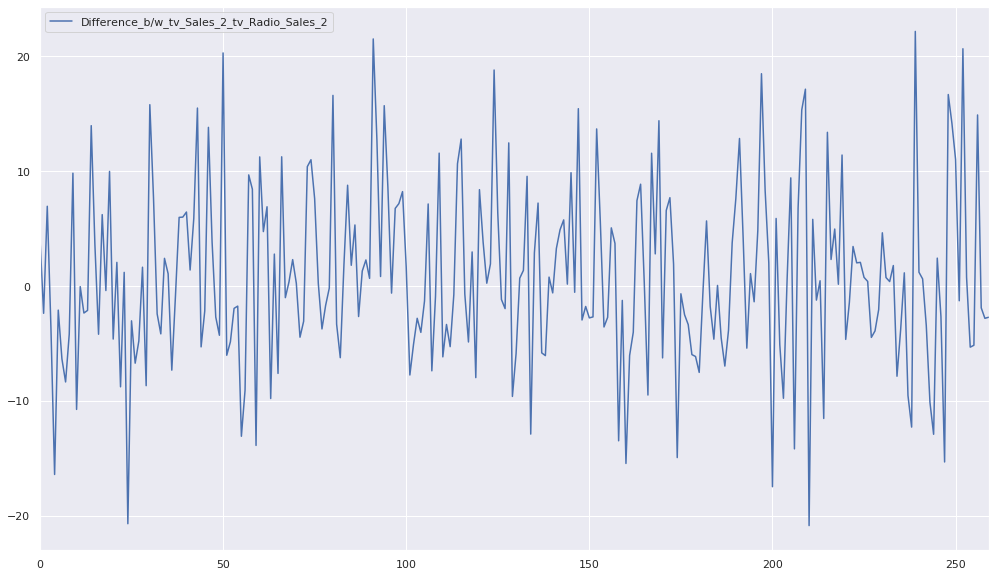

In [0]:
test_new_radio2.plot(y='Difference_b/w_tv_Sales_2_tv_Radio_Sales_2',figsize=(17,10), grid=True)

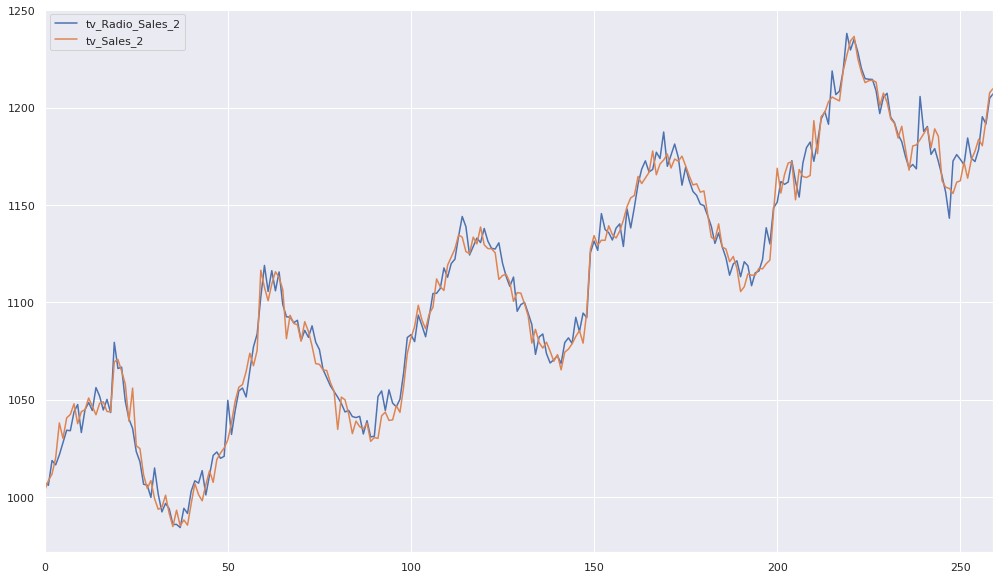

In [0]:
test_new_radio2.plot(y=['tv_Radio_Sales_2','tv_Sales_2'],figsize=(17,10), grid=True)

Index(['base_sales', 'tv_Sales_1', 'temp', 'tv_spend', 'week', 'adstock_TV_1',
       'tv_Sales_2', 'tv_Radio_Sales_1', 'tv_Radio_Sales_2', 'radioSpend',
       'tv_Sales_2_Adstock', 'tv_Radio_Sales_1_Adstock',
       'tv_Radio_Sales_2_Adstock', 'Serial number', 'Normalized_base_sales',
       'new_temp', 'Adstock1', 'Adstock1radio', 'Adstock2'],
      dtype='object')

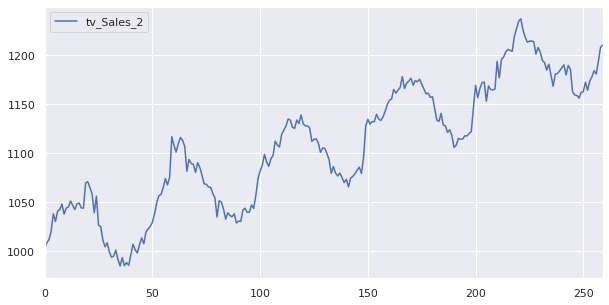

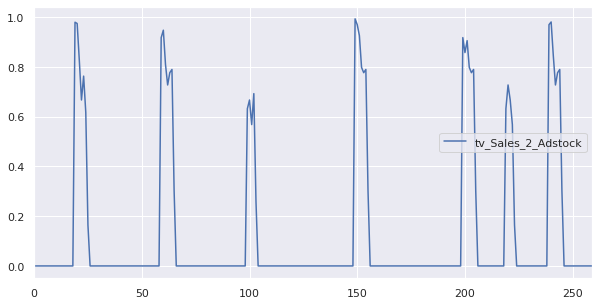

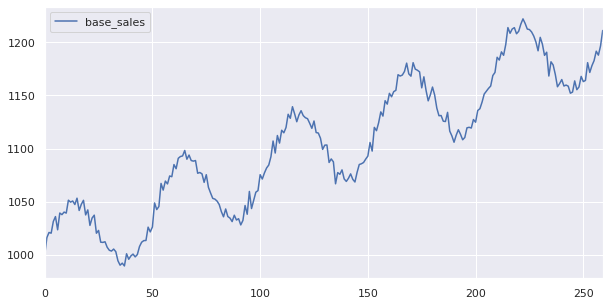

In [0]:
test.plot(y=['tv_Sales_2'],figsize=(10,5), grid=True)
test.plot(y=['tv_Sales_2_Adstock'],figsize=(10,5), grid=True)
test.plot(y=['base_sales'],figsize=(10,5), grid=True)

test.columns


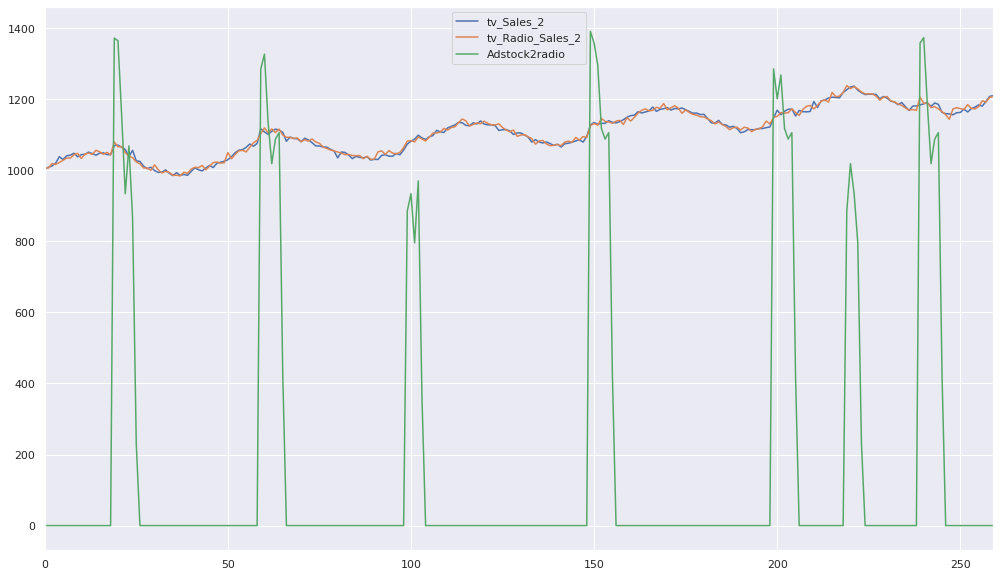

In [0]:
test['Adstock2radio']= test['tv_Radio_Sales_2_Adstock']*1400
test.plot(y=['tv_Sales_2','tv_Radio_Sales_2','Adstock2radio'],figsize=(17,10), grid=True)